# Academic Research on FER Datasets


So the project primarily utilized the following:

Requests: For accessing web pages.
BeautifulSoup: For HTML parsing.
Scholarly API and Google search: As external libraries for structured data retrieval.

## 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from scholarly import scholarly
from googlesearch import search
from bs4 import BeautifulSoup
import requests

## 2: Define FER Datasets

using satasetlist from here:
https://arxiv.org/pdf/1804.08348v2

In [2]:
fer_datasets = ["CK+", "MMI", "JAFFE", "TFD", "FER-2013", "AFEW7.0", 
    "SFEW2.0", "Multi-PIE", "BU-3DFE", "Oulu-CASIA", 
    "RaFD", "KDEF", "EmotioNet", "RAF-DB", "AffectNet", "ExpW"]


## 3: Search arXiv API

not sufficient - no citation count - probably could be solved with SemanticScholar, but in reality it was not working

## 4: Use CrossRef API for Citation Counts

There were only researh papers found in this topic cited less than 50

## 5: Collect Data from Scholarly
Issue: no year filter, can be done later....

In [13]:
'''# Function to search scholarly papers and collect extended information
def search_scholarly(dataset_name):
    search_query = scholarly.search_pubs(dataset_name)
    papers = []
    
    # Try to fetch a larger set of results to ensure we capture the most cited papers
    for _ in range(30):  # Adjust this number as needed (30 is ok, from 45 was stopped, 60 is too much)
        try:
            paper = next(search_query)
            # Collecting only papers with more than a certain citation threshold (e.g., 10)
            if 'num_citations' in paper and paper['num_citations'] >= 100:  # Adjust threshold as needed
                paper_info = {
                    'Title': paper['bib'].get('title', 'No Title'),
                    'Authors': paper['bib'].get('author', 'No Author'),
                    'Year': paper['bib'].get('pub_year', None),
                    'Cited By': paper['num_citations'],
                    'Dataset': dataset_name,
                    'Abstract': paper['bib'].get('abstract', ''),  # Extract abstract if available
                    'URL': None  # Initialize URL as None
                }

                # Check for mentions of "bias", "F1", or "accuracy" in the abstract
                abstract = paper_info['Abstract'].lower() if paper_info['Abstract'] else ''
                paper_info['Mentions_F1'] = 'f1' in abstract
                paper_info['Mentions_Accuracy'] = 'accuracy' in abstract
                paper_info['Mentions_Bias'] = 'bias' in abstract
                
                # Perform a Google search to find the paper's URL
                try:
                    search_results = search(paper_info['Title'], num_results=1)  # Get top search result
                    for url in search_results:
                        paper_info['URL'] = url
                        break  # Only take the first result
                except Exception as e:
                    print(f"Error finding URL for {paper_info['Title']}: {e}")
                    paper_info['URL'] = None
                
                papers.append(paper_info)
                
                # If we've collected 10 highly cited papers, break out of the loop
                if len(papers) >= 10:
                    break

            time.sleep(2)  # Add delay to avoid rate limits
        except StopIteration:
            break
        except Exception as e:
            print(f"An error occurred: {e}")
            continue
    
    return papers

# Collect data from Scholarly for each dataset
scholarly_results = []

for dataset in fer_datasets:
    print(f"Searching for dataset: {dataset}")
    scholarly_results.extend(search_scholarly(dataset))

# Store results in a DataFrame
scholarly_df = pd.DataFrame(scholarly_results)

scholarly_df.to_csv('scholarly_papers.csv', index=False)
print("Data collection completed.")'''

'# Function to search scholarly papers and collect extended information\ndef search_scholarly(dataset_name):\n    search_query = scholarly.search_pubs(dataset_name)\n    papers = []\n    \n    # Try to fetch a larger set of results to ensure we capture the most cited papers\n    for _ in range(30):  # Adjust this number as needed (30 is ok, from 45 was stopped, 60 is too much)\n        try:\n            paper = next(search_query)\n            # Collecting only papers with more than a certain citation threshold (e.g., 10)\n            if \'num_citations\' in paper and paper[\'num_citations\'] >= 100:  # Adjust threshold as needed\n                paper_info = {\n                    \'Title\': paper[\'bib\'].get(\'title\', \'No Title\'),\n                    \'Authors\': paper[\'bib\'].get(\'author\', \'No Author\'),\n                    \'Year\': paper[\'bib\'].get(\'pub_year\', None),\n                    \'Cited By\': paper[\'num_citations\'],\n                    \'Dataset\': dataset

In [14]:
file_path = 'scholarly_papers.csv'  
FER_df = pd.read_csv(file_path)
print(FER_df.shape)
FER_df.head()

(85, 10)


,Title,Authors,Year,Cited By,Dataset,Abstract,URL,Mentions_F1,Mentions_Accuracy,Mentions_Bias
0,The extended cohn-kanade dataset (ck+): A comp...,"['P Lucey', 'JF Cohn', 'T Kanade', 'J Saragih']",2010,5134,CK+,"In 2000, the Cohn-Kanade (CK) database was rel...",https://ieeexplore.ieee.org/document/5543262,False,False,False
1,A Novel Platform for Detection of CK+ and CK− ...,"['CV Pecot', 'FZ Bischoff', 'JA Mayer', 'KL Wo...",2011,225,CK+,"Metastasis is a complex, multistep process tha...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,False,False,False
2,All circulating EpCAM+ CK+ CD45-objects predic...,"['FAW Coumans', 'CJM Doggen', 'G Attard', 'JS ...",2010,241,CK+,Background Presence of five or more circulatin...,https://pubmed.ncbi.nlm.nih.gov/20147742/,False,False,False
3,Patterns of circulating tumor cells identified...,"['Y Zhang', 'F Wang', 'N Ning', 'Q Chen']",2015,102,CK+,To improve the identification for CTCs with we...,https://pubmed.ncbi.nlm.nih.gov/25042121/,False,False,False
4,Detection of breast cancer cells in the periph...,"['JJ Gaforio', 'MJ Serrano']",2003,181,CK+,We investigated whether detection of cytokerat...,https://pubmed.ncbi.nlm.nih.gov/14601059/,False,False,False


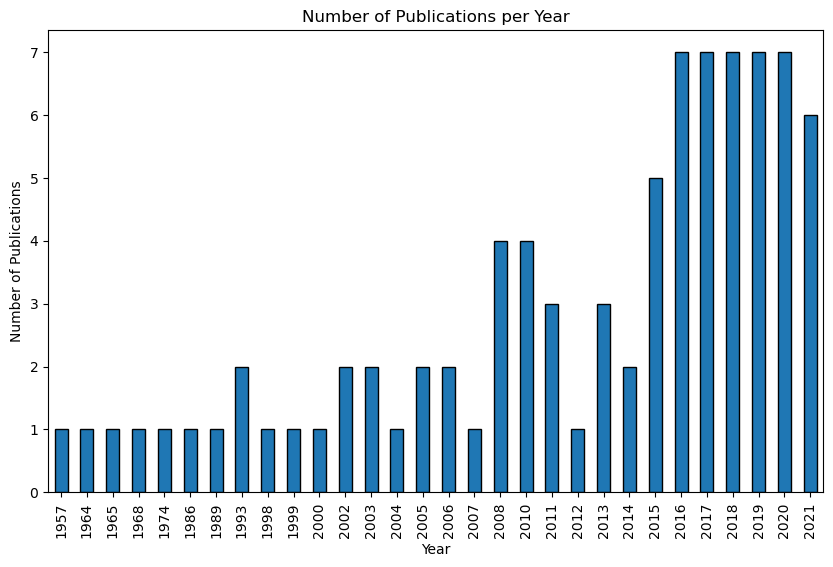

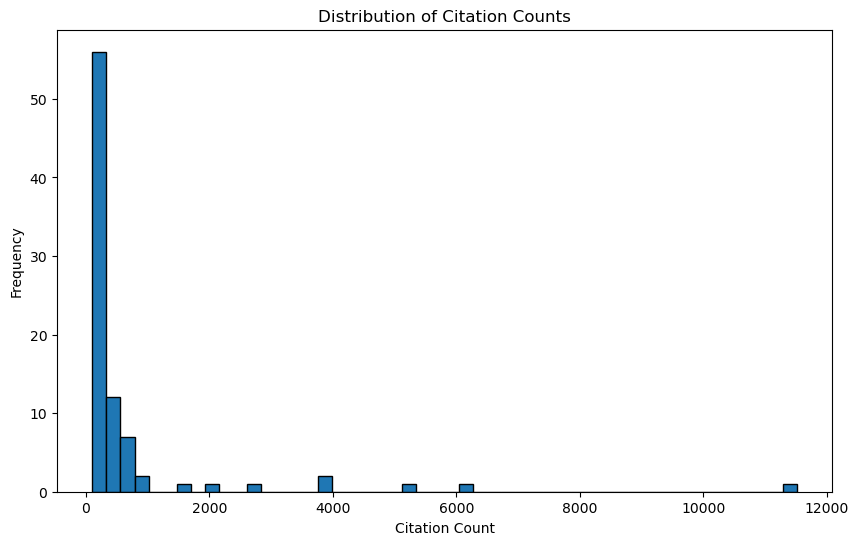

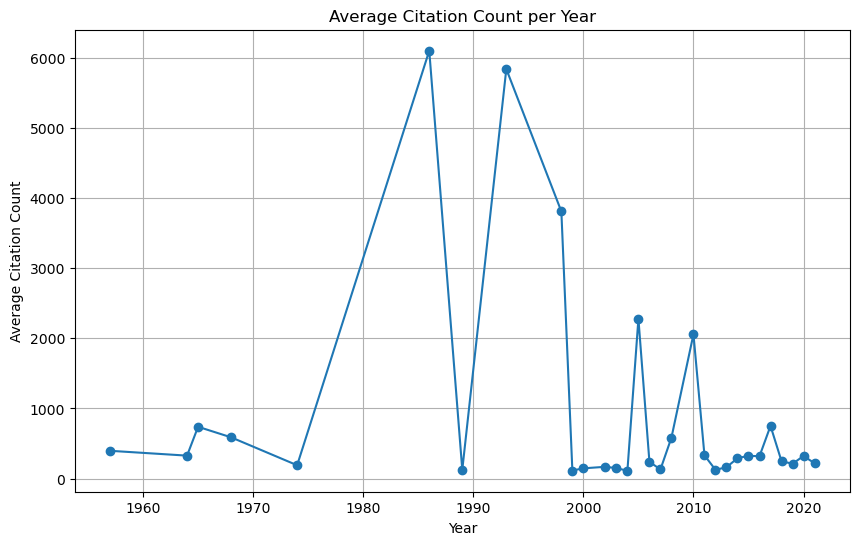

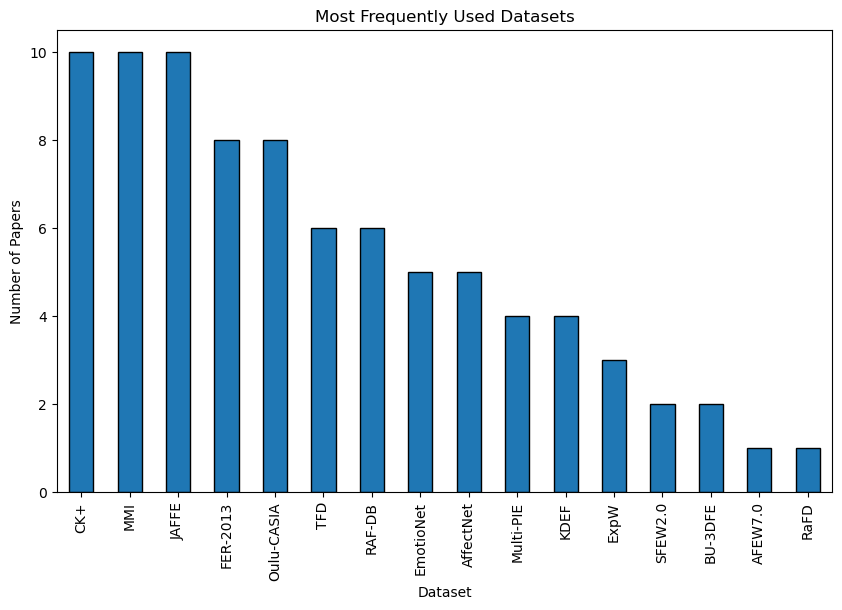

In [16]:
# Plot 1: Distribution of publications over the years
plt.figure(figsize=(10, 6))
FER_df['Year'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

# Plot 2: Distribution of citation counts
plt.figure(figsize=(10, 6))
plt.hist(FER_df['Cited By'], bins=50, edgecolor='black')
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Average citation count per year
avg_citations_per_year = FER_df.groupby('Year')['Cited By'].mean()
plt.figure(figsize=(10, 6))
avg_citations_per_year.plot(kind='line', marker='o')
plt.title('Average Citation Count per Year')
plt.xlabel('Year')
plt.ylabel('Average Citation Count')
plt.grid(True)
plt.show()

# Plot 4: Most frequently used datasets
plt.figure(figsize=(10, 6))
FER_df['Dataset'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Most Frequently Used Datasets')
plt.xlabel('Dataset')
plt.ylabel('Number of Papers')
plt.show()

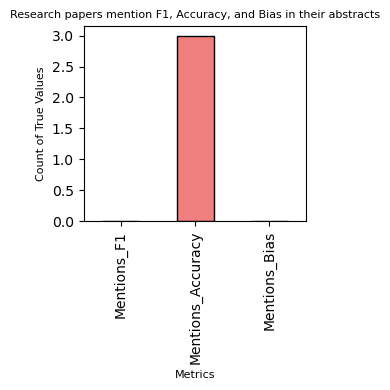

In [28]:
# Calculate the count of True values in each column
true_values_count = FER_df[['Mentions_F1', 'Mentions_Accuracy', 'Mentions_Bias']].sum()

# Plotting the count of true values
plt.figure(figsize=(3,4))
true_values_count.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding title and labels
plt.title('Research papers mention F1, Accuracy, and Bias in their abstracts', fontsize=8)
plt.ylabel('Count of True Values', fontsize=8)
plt.xlabel('Metrics', fontsize=8)

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
